## circle()

The following function, `circle(xy, radius, kwargs=None)`, is a customised wrapper for `patches.Ellipse` to draw nice circles on a figure even if the axes have very different dimensions. I explain it here with some examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, patches

# Increase font size, set CM as default text, and use LaTeX
rc('font', **{'size': 16, 'family': 'serif', 'serif': ['Computer Modern Roman']})
rc('text', usetex=True)

# Define colours (taken from http://colorbrewer2.org)
clr = ['#377eb8', '#e41a1c', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']

### Load the `circle`-function
(You can find it in the notebook `adashof.ipynb`, in the same repo as this notebook).

In [2]:
%load -s circle adashof.py

In [3]:
def circle(xy, radius, kwargs=None):
    """Create circle on figure with axes of different sizes.

    Plots a circle on the current axes using `plt.Circle`, taking into account
    the figure size and the axes units.

    It is done by plotting in the figure coordinate system, taking the aspect
    ratio into account. In this way, the data dimensions do not matter.
    However, if you adjust `xlim` or `ylim` after plotting `circle`, it will
    screw them up; set `plt.axis` before calling `circle`.

    Parameters
    ----------
    xy, radius, kwars :
        As required for `plt.Circle`.

    """

    # Get current figure and axis
    fig = plt.gcf()
    ax = fig.gca()

    # Calculate figure dimension ratio width/height
    pr = fig.get_figwidth()/fig.get_figheight()

    # Get the transScale (important if one of the axis is in log-scale)
    tscale = ax.transScale + (ax.transLimits + ax.transAxes)
    ctscale = tscale.transform_point(xy)
    cfig = fig.transFigure.inverted().transform(ctscale)

    # Create circle
    if kwargs == None:
        circ = patches.Ellipse(cfig, radius, radius*pr,
                transform=fig.transFigure)
    else:
        circ = patches.Ellipse(cfig, radius, radius*pr,
                transform=fig.transFigure, **kwargs)

    # Draw circle
    ax.add_artist(circ)

### Linear example

The following are four different plots with linear scales to illustrate the problem addressed and the usage of `circle`:

- 1.a Using `plt.Circle` to draw circles on a figure with equal axes.
- 1.b Using `plt.Circle` to draw circles on a figure with unequal axes.
- 1.c Using `patches.Ellipse` on a figure with unequal axes to draw apparent circles.
- 1.d Using this custom `circle` function on a figure with unequal axes to plot circles.

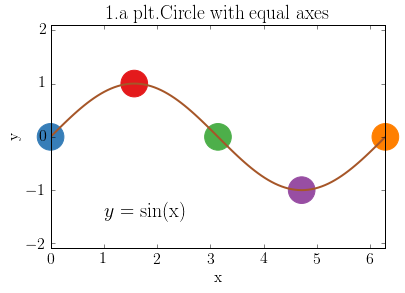

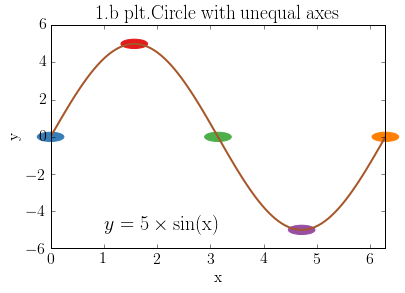

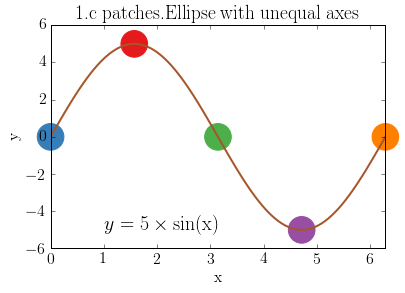

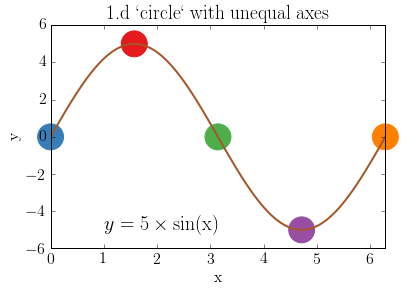

In [4]:
# Generate some data to plot
x = np.arange(101)/100*2*np.pi
y = np.sin(x)

# Circle centres
cxy = (np.arange(5)*np.pi/2, np.sin(np.arange(5)*np.pi/2))


## 1.a Using plt.Circle on equal axes

# Create figure
fig1a = plt.figure()

# Set axis to equal
plt.axis('equal')

# Plot data and set limits
plt.plot(x, y, '-', c=clr[6], lw=2)
plt.xlim([min(x), max(x)])

# Draw circles with plt.Circle
# (`clip_on: False` ensures that the circles are not cut-off at fig-border.)
for i in range(5):
    circ = plt.Circle((cxy[0][i], cxy[1][i]), .25, **{'color':clr[i], 'clip_on': False})
    plt.gca().add_artist(circ)

# Set labels
plt.title('1.a plt.Circle with equal axes')
plt.text(1, -1.5, r'$y = \rm{sin}(x)$', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')

# Multiply y-values by 5, to make the effect of unequal axes more apparent
y *= 5
cxy = (np.arange(5)*np.pi/2, 5*np.sin(np.arange(5)*np.pi/2))


## 1.b Using plt.Circle on unequal axes

# Create figure
fig1b = plt.figure()

# Plot data and set limits
plt.plot(x, y, '-', c=clr[6], lw=2)
plt.axis([min(x), max(x), 1.2*min(y), 1.2*max(y)])

# Draw circles with plt.Circle
for i in range(5):
    circ = plt.Circle((cxy[0][i], cxy[1][i]), .25, **{'color':clr[i], 'clip_on': False})
    plt.gca().add_artist(circ)

# Set labels
plt.title('1.b plt.Circle with unequal axes')
plt.text(1, -5, r'$y = 5\times\rm{sin}(x)$', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')


## 1.c Using patches.Ellipse on unequal axes

# Create figure
fig1c = plt.figure()

# Plot data and set limits
plt.plot(x, y, '-', c=clr[6], lw=2)
plt.axis([min(x), max(x), 1.2*min(y), 1.2*max(y)])

# Calculate width and height of Ellipse to create an apparent circle
factor = fig1c.get_figwidth()*(max(1.2*y)-min(1.2*y))/fig1c.get_figheight()/(max(x)-min(x))

# Draw circles with patches.Ellipse
for i in range(5):
    circ = patches.Ellipse((cxy[0][i], cxy[1][i]), .5, .5*factor,
                           **{'color':clr[i], 'clip_on': False})
    plt.gca().add_artist(circ)

# Set labels
plt.title('1.c patches.Ellipse with unequal axes')
plt.text(1, -5, r'$y = 5\times\rm{sin}(x)$', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')


## 1.d Using circle on unequal axes

# Create figure
fig1d = plt.figure()

# Plot data and set limits (before plotting the circles!)
plt.plot(x, y, '-', c=clr[6], lw=2)
plt.axis([min(x), max(x), 1.2*min(y), 1.2*max(y)])

# Draw circles with circle
for i in range(5):
    circle((cxy[0][i], cxy[1][i]), .06, {'color':clr[i], 'clip_on': False})

# Set labels
plt.title('1.d `circle` with unequal axes')
plt.text(1, -5, r'$y = 5\times\rm{sin}(x)$', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')


plt.show()

### Semilog and loglog example

The final two examples show that this method also works for `semilog` and `loglog` plots.

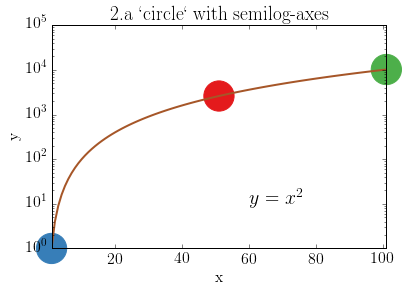

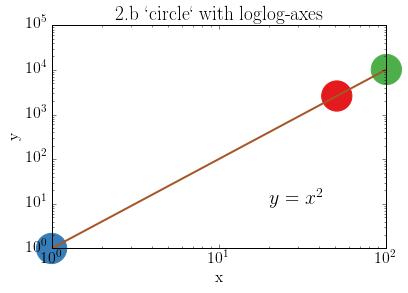

In [5]:
# Generate some data to plot
lx = np.arange(1, 102)
ly = lx**2

# Circle centres
lcxy = (np.arange(3)*50+1, (np.arange(3)*50+1)**2)


## 2.a Semilog

# Create figure
fig2a = plt.figure()

# Plot data and set limits
plt.semilogy(lx, ly, '-', c=clr[6], lw=2)
plt.xlim([min(lx), max(lx)])

# Plot circles
for i in range(3):
    circle((lcxy[0][i], lcxy[1][i]), 0.07, {'color':clr[i], 'clip_on': False})
    
# Set labels
plt.title('2.a `circle` with semilog-axes')
plt.text(60, 10, r'$y = x^2$', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')


## 2.b Loglog

# Create figure
fig2a = plt.figure()

# Plot data and set limits
plt.loglog(lx, ly, '-', c=clr[6], lw=2)
plt.xlim([min(lx), max(lx)])

# Plot circles
for i in range(3):
    circle((lcxy[0][i], lcxy[1][i]), .07, {'color':clr[i], 'clip_on': False})
    
# Set labels
plt.title('2.b `circle` with loglog-axes')
plt.text(20, 10, r'$y = x^2$', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')


plt.show()